In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ignore all warnings
import warnings
warnings.filterwarnings("ignore")


# import data
train_set= pd.read_csv('./Data/train.csv', index_col= 'id')
test_set= pd.read_csv('./Data/test.csv', index_col= 'id')


In [2]:
# store all duplicated columns
duplicated_cols_dict= {}
duplicated_cols_list_full = []


# THIS FUNCTION is to drop all duplicates columns
for i, col in enumerate(train_set.columns):
    duplicated_cols_list= []
    # if the col is already one of the keys
    # then skip
    if col in duplicated_cols_list_full:
        continue
    for c in train_set.columns:
        if (train_set[col].equals(train_set[c])):
            duplicated_cols_list.append(c)
            duplicated_cols_list_full.append(c)
        
           
    if (len(duplicated_cols_list) > 1):
        duplicated_cols_dict[col] = duplicated_cols_list   

In [4]:
from matplotlib.cbook import flatten

drop_cols = set(list(flatten(list(duplicated_cols_dict.values())))) - set(duplicated_cols_dict.keys())

In [6]:
train_set= train_set.drop(drop_cols, axis= 1)
test_set= test_set.drop(drop_cols, axis= 1)

In [7]:
train_set.columns

Index(['label', 'Field_1', 'Field_2', 'Field_3', 'Field_4', 'Field_5',
       'Field_6', 'Field_7', 'Field_8', 'Field_9',
       ...
       'partner5_A', 'partner5_D', 'partner5_G', 'brief', 'num_of_phone',
       'Field_78', 'Field_79', 'Field_80', 'Field_81', 'Field_82'],
      dtype='object', length=148)

In [8]:
cols_Vincent = train_set.columns[:int(len(train_set.columns)/2)]
cols_Duong = train_set.columns[int(len(train_set.columns)/2):]

Text(0.5, 1.0, 'Percentages of missing values in each column')

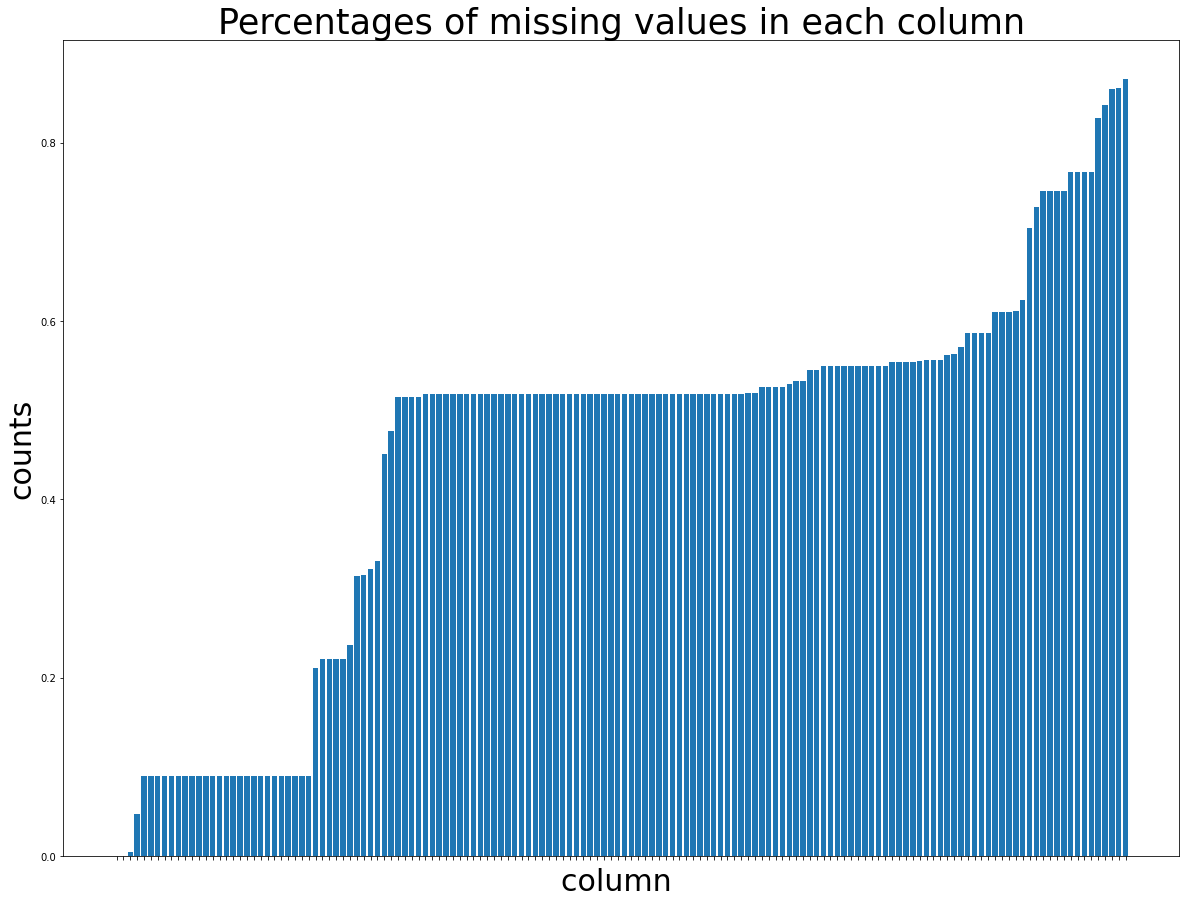

In [11]:
na_counts= train_set.isna().sum().sort_values()
fig, ax = plt.subplots(figsize= (20,15))
total_samples= len(train_set)

ax.bar(na_counts.index,na_counts.values/total_samples)
ax.set_xlabel("column ", fontsize= 30)
ax.set_ylabel("counts", fontsize= 30)
ax.set_xticklabels([])
ax.set_title("Percentages of missing values in each column", fontsize= 35)

In [12]:
train_set.describe()

,label,Field_3,Field_10,Field_13,Field_19,Field_20,Field_21,Field_22,Field_23,Field_27,...,partner4_L,partner5_A,partner5_D,partner5_G,num_of_phone,Field_78,Field_79,Field_80,Field_81,Field_82
count,53030.000000,25564.000000,25564.000000,25564.0,25564.000000,2.556400e+04,25564.000000,25564.000000,25564.000000,2.556400e+04,...,48283.000000,48283.000000,48283.000000,48283.000000,50518.000000,36397.00000,27782.000000,36320.000000,35981.000000,53030.000000
mean,0.316726,1.538687,1.096542,1.0,0.267022,3.603181e+06,4.485331,0.999452,31.472540,2.252840e+05,...,0.306464,0.254334,0.000124,0.000041,1.087236,20.80144,30.911307,-1.793163,-32.149412,1.668659
std,0.465204,0.498511,0.332593,0.0,0.835968,2.282034e+06,0.281697,0.053069,46.238001,8.423081e+05,...,0.461030,0.435491,0.011147,0.006436,0.297815,40.10993,35.968215,32.176041,63.442452,1.090910
min,0.000000,1.000000,0.000000,1.0,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,1.000000,-267.00000,0.000000,-267.000000,-290.000000,1.000000
25%,0.000000,1.000000,1.000000,1.0,0.000000,1.490000e+06,4.500000,1.000000,1.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,1.000000,4.00000,5.326888,-5.600000,-69.000000,1.000000
50%,0.000000,2.000000,1.000000,1.0,0.000000,3.801000e+06,4.500000,1.000000,14.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,1.000000,16.00000,15.556349,2.086957,0.000000,1.000000
75%,1.000000,2.000000,1.000000,1.0,0.000000,4.500000e+06,4.500000,1.000000,40.000000,0.000000e+00,...,1.000000,1.000000,0.000000,0.000000,1.000000,36.00000,46.013087,9.500000,1.000000,2.000000
max,1.000000,2.000000,5.000000,1.0,6.864000,2.980000e+07,6.000000,2.000000,464.000000,2.000000e+07,...,1.000000,1.000000,1.000000,1.000000,5.000000,242.00000,325.976226,238.000000,238.000000,4.000000


In [ ]:
print ("Labels count")
train_set.label.value_counts()

In [ ]:
corrs = train_set.corr()['label'].sort_values()
# exclude nan corrs
corrs = corrs[corrs.values < 1]

fig, ax = plt.subplots(figsize= (20,15))
total_samples= len(train_set)

ax.bar(corrs.index,corrs.values)
ax.set_xlabel("column ", fontsize= 30)
ax.set_ylabel("correlation", fontsize= 30)
ax.set_xticklabels([])
ax.set_title("Correlation with labels", fontsize= 35)

## Duong's part

In [ ]:
data_Duong = train_set[cols_Duong]
data_Duong['label']= train_set['label'].values

In [ ]:
data_Duong.head()

In [ ]:
na_counts= data_Duong.isna().sum().sort_values()
fig, ax = plt.subplots(figsize= (20,15))
total_samples= len(data_Duong)

ax.bar(na_counts.index,na_counts.values/total_samples)
ax.set_xlabel("column ", fontsize= 30)
ax.set_ylabel("counts", fontsize= 30)
ax.set_xticklabels([])
ax.set_title("Percentages of missing values in each column", fontsize= 35)

In [ ]:
corrs = data_Duong.corr()['label'].sort_values()
# exclude nan corrs
corrs = corrs[corrs.values < 1]

fig, ax = plt.subplots(figsize= (20,15))
total_samples= len(data_Duong)

ax.bar(corrs.index, corrs.values)
ax.set_xlabel("column ", fontsize= 30)
ax.set_ylabel("correlation", fontsize= 30)
ax.set_xticklabels([])
ax.set_title("Correlation with labels", fontsize= 35)

In [ ]:
train_set[['Field_46', 'Field_48', 'Field_49']]

In [ ]:
pd.crosstab(data_Duong['label'],\
            data_Duong['homeTownCountry'], dropna= False)

In [ ]:
for i, col in enumerate(data_Duong.columns):
    print (i+1, "/ Column name:", col)
    print(data_Duong[col].value_counts(dropna=False))

## create custom columns

### column diff_start_end_date = diff between E_startDate and E_endDate

In [ ]:
data_Duong.columns

In [ ]:
from datetime import datetime

data_Duong['E_endDate'] = data_Duong['E_endDate'].apply(lambda row: \
              datetime.strptime('1900-01-01', '%Y-%m-%d') \
                    if row is np.nan \
                else datetime.strptime(row, '%Y-%m-%d'))

data_Duong['E_startDate'] = data_Duong['E_startDate'].apply(lambda row: \
              datetime.strptime('1900-01-01', '%Y-%m-%d') \
                    if row is np.nan \
                else datetime.strptime(row, '%Y-%m-%d'))


data_Duong['F_endDate'] = data_Duong['F_endDate'].apply(lambda row: \
              datetime.strptime('1900-01-01', '%Y-%m-%d') \
                    if row is np.nan \
                else datetime.strptime(row, '%Y-%m-%d'))

data_Duong['F_startDate'] = data_Duong['F_startDate'].apply(lambda row: \
              datetime.strptime('1900-01-01', '%Y-%m-%d') \
                    if row is np.nan \
                else datetime.strptime(row, '%Y-%m-%d'))

data_Duong['G_startDate'] = data_Duong['G_startDate'].apply(lambda row: \
              datetime.strptime('1900-01-01', '%Y-%m-%d') \
                    if row is np.nan \
                else datetime.strptime(row, '%Y-%m-%d'))

data_Duong['G_endDate'] = data_Duong['G_endDate'].apply(lambda row: \
              datetime.strptime('1900-01-01', '%Y-%m-%d') \
                    if row is np.nan \
                else datetime.strptime(row, '%Y-%m-%d'))               


data_Duong['A_endDate'] = data_Duong['A_endDate'].apply(lambda row: \
              datetime.strptime('1900-01-01', '%Y-%m-%d') \
                    if row is np.nan \
                else datetime.strptime(row, '%Y-%m-%d'))

data_Duong['A_startDate'] = data_Duong['A_startDate'].apply(lambda row: \
              datetime.strptime('1900-01-01', '%Y-%m-%d') \
                    if row is np.nan \
                else datetime.strptime(row, '%Y-%m-%d'))               

## *letter*_diff_date = diff between *letter*_startDate and *letter*_endDate

In [ ]:
data_Duong['E_diff_date']= data_Duong['E_endDate'] - data_Duong['E_startDate']

data_Duong['F_diff_date']= data_Duong['F_endDate'] - data_Duong['F_startDate']

data_Duong['G_diff_date']= data_Duong['G_endDate'] - data_Duong['G_startDate']

data_Duong['A_diff_date']= data_Duong['A_endDate'] - data_Duong['A_startDate']

## Explore topfriends

In [ ]:
topFriends_counts = data_Duong['topFriends'].value_counts(dropna= False)
plt.bar(topFriends_counts.index, topFriends_counts.values)

In [ ]:
topFriends_counts

In [ ]:
train_set['E_endDate'].equals(train_set['G_endDate'])

In [ ]:
train_set[['Field_14','Field_16']].drop_duplicates()

In [ ]:
for i in range(10):
    if (i%3 == 0):
        continue
    print (i)

In [ ]:
from matplotlib.cbook import flatten

set(list(flatten(list(duplicated_cols_dict.values())))) - set(duplicated_cols_dict.keys())

In [ ]:
drop_cols = set(list(flatten(list(duplicated_cols_dict.values())))) - set(duplicated_cols_dict.keys())

In [ ]:
duplicated_cols_dict.values()

In [ ]:
drop_cols = set(list(flatten(list(duplicated_cols_dict.values())))) - set(duplicated_cols_dict.keys())

In [ ]:
set(duplicated_cols_dict.values()) - set(duplicated_cols_dict.keys())

In [ ]:
# store all duplicated columns
duplicated_cols_dict= {}
duplicated_cols_list_full = []

for i, col in enumerate(train_set.columns):
    duplicated_cols_list= []
    # if the col is already one of the keys
    # then skip
    if col in duplicated_cols_list_full:
        continue
    for c in train_set.columns:
        if (train_set[col].equals(train_set[c])):
            duplicated_cols_list.append(c)
            duplicated_cols_list_full.append(c)
        
           
    if (len(duplicated_cols_list) > 1):
        duplicated_cols_dict[col] = duplicated_cols_list   